In [1]:
# 导入模块
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
uid_to_human = {}
# 读取把标签文件
# 
# 按行读取标签
lines = tf.gfile.GFile(name='output_labels.txt', mode='r').readlines()

for uid, line in enumerate(lines): # enumerate() 函数返回 元素索引，元素。如：['a', 'b'] 返回 0 a, 1 b
    # 去掉每一行最后的换行符 '\n'
    line = line.strip('\n')
    uid_to_human[uid] = line
# 打印
# print(uid_to_human)

def id_to_string(node_id):
    '''
    param:
        node_id:
            为模型预测的编号。如 [0.12, 0.68, 0.20]，获取最大值及索引，索引代表着模型认为图片时什么的实体（airplane, face, flower）
            然后在 uid_to_human 对应获取实体名称
    '''
    if node_id not in uid_to_human:
        return 'Not Know'
    return uid_to_human[node_id]

In [3]:
# 加载训练好的模型
with tf.gfile.GFile(name='new_model/output_graph.pb', mode='rb') as f:
    # 初始化协议（保存加载的图）
    graph_def = tf.GraphDef()
    graph_def.ParseFromString(f.read())
    # 将载入的图设为默认图
    tf.import_graph_def(graph_def=graph_def)
    
    # 获取默认图
    graph = tf.get_default_graph()
    # 获取 输入 tensor
    x_tensor = graph.get_tensor_by_name(name='import/DecodeJpeg/contents:0')
    # 获取分类 tensor
    softmax_tensor = graph.get_tensor_by_name(name='import/final_result:0')
    #for op in graph.get_operations():
    #    print(op.name)

test/images (1).jpg


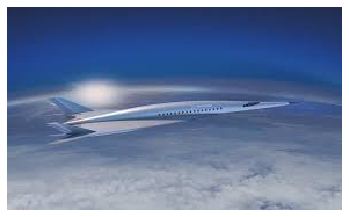

airplane (score = 0.88084)
flower (score = 0.06805)
face (score = 0.05111)

test/images (2).jpg


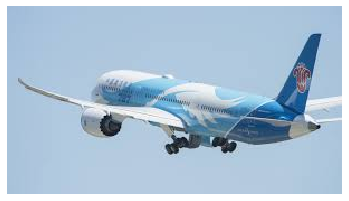

airplane (score = 0.98542)
face (score = 0.00739)
flower (score = 0.00719)

test/images (3).jpg


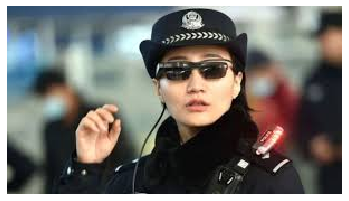

face (score = 0.65839)
flower (score = 0.19235)
airplane (score = 0.14926)

test/images (4).jpg


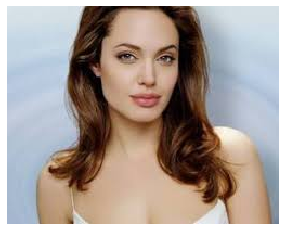

face (score = 0.74286)
flower (score = 0.15110)
airplane (score = 0.10604)

test/images.jpg


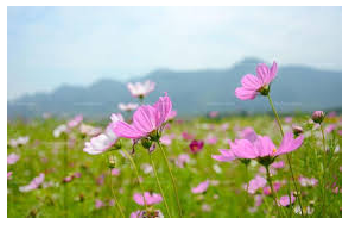

flower (score = 0.98528)
airplane (score = 0.00909)
face (score = 0.00563)

test/下载 (1).jpg


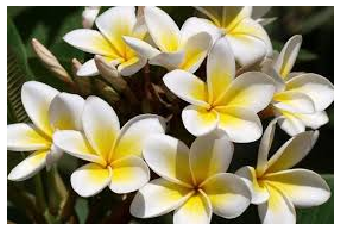

flower (score = 0.98630)
airplane (score = 0.01028)
face (score = 0.00342)

test/下载 (10).jpg


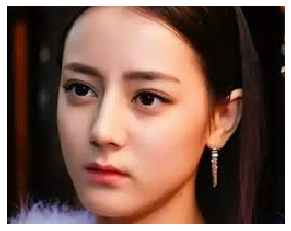

face (score = 0.87647)
flower (score = 0.07959)
airplane (score = 0.04393)

test/下载 (11).jpg


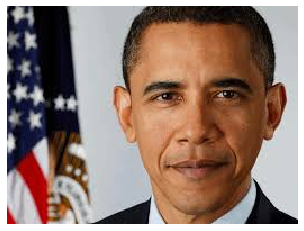

face (score = 0.88179)
airplane (score = 0.06868)
flower (score = 0.04953)

test/下载 (2).jpg


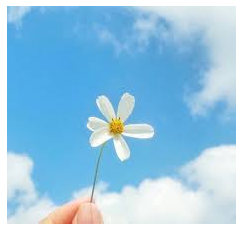

flower (score = 0.87898)
airplane (score = 0.06973)
face (score = 0.05129)

test/下载 (3).jpg


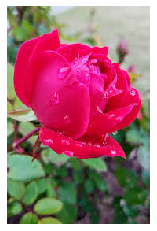

flower (score = 0.98335)
face (score = 0.00849)
airplane (score = 0.00817)

test/下载 (4).jpg


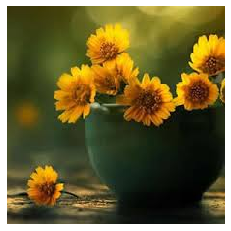

flower (score = 0.94015)
airplane (score = 0.03797)
face (score = 0.02187)

test/下载 (5).jpg


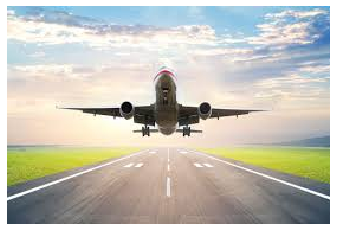

airplane (score = 0.98481)
flower (score = 0.00778)
face (score = 0.00740)

test/下载 (6).jpg


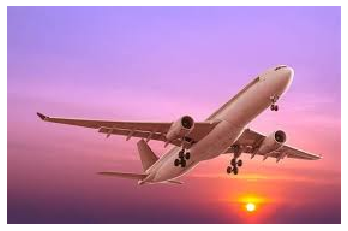

airplane (score = 0.98727)
flower (score = 0.00789)
face (score = 0.00484)

test/下载 (7).jpg


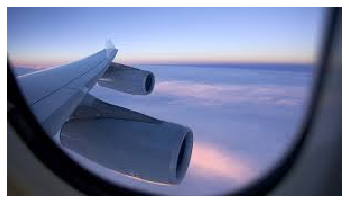

airplane (score = 0.70190)
flower (score = 0.16404)
face (score = 0.13406)

test/下载 (8).jpg


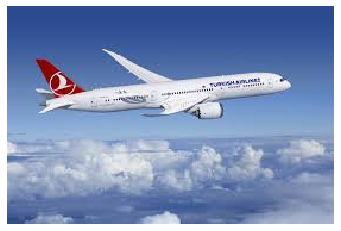

airplane (score = 0.98248)
flower (score = 0.01006)
face (score = 0.00746)

test/下载 (9).jpg


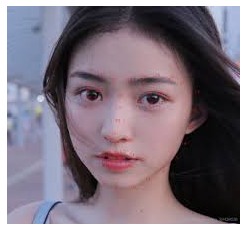

face (score = 0.96068)
flower (score = 0.02344)
airplane (score = 0.01588)

test/下载.jpg


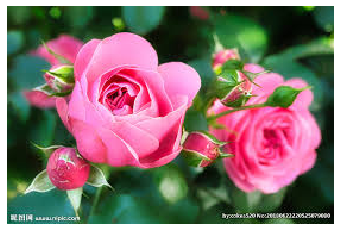

flower (score = 0.99081)
face (score = 0.00507)
airplane (score = 0.00412)



In [10]:
with tf.Session() as sess:
    # 加载测试图片
    for file_name in os.listdir(path='test/'):
        file_path = os.path.join('test/', file_name)
        # 读取图片数据
        image_data = tf.gfile.GFile(name=file_path, mode='rb').read()
        # 使用模型预测
        predictions = sess.run(softmax_tensor, feed_dict={x_tensor: image_data})
        # 将预测结果变成 1 维
        predictions = np.squeeze(a=predictions)
        
        # 打印图片及路径
        print(file_path)
        img = Image.open(fp=file_path)
        plt.imshow(X=img)
        # 去掉 轴（x轴，y轴）
        plt.axis('off')
        plt.show()
        # .argsort() 从小到大排序，排序的数据是索引值
        top_k = predictions.argsort()[::-1]
        
        for node_id in top_k:
            human_string = id_to_string(node_id=node_id)
            # node_id 是索引值
            score = predictions[node_id]
            print('%s (score = %.5f)'%(human_string, score))
        print()